In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Veri setini yükleme
data=pd.read_csv('C:/mydata/Cleaned_Dataset.csv')
df=pd.DataFrame(data)

In [4]:
#Verinin özelliklerini inceleme
data.head

<bound method NDFrame.head of              Company  Company Score  \
0         Razorpoint            3.4   
1      tower Hamlets            3.7   
2                 TW            4.0   
3      NatWest Group            4.6   
4              iwoca            3.9   
..               ...            ...   
630     Qureight Ltd            3.4   
631          Causaly            3.5   
632              GSK            3.8   
633        InstaDeep            3.7   
634  Cyclotron, Inc.            4.1   

                                             Job Title  Date   Salary  \
0                                Junior Data Scientist   3.0  35000.0   
1         Assistant Data Scientist (Graduate) | R-2375   5.0  64480.0   
2                                       Data Scientist  31.0  57500.0   
3                                       Data Scientist   2.0  47500.0   
4                                 Data Scientist - Ops   7.0  75000.0   
..                                                 ...   ...   

In [5]:
data.columns

Index(['Company', 'Company Score', 'Job Title', 'Date', 'Salary', 'Skills',
       'Estimation Type', 'Remote', 'City', 'Country'],
      dtype='object')

In [6]:
data.dtypes

Company             object
Company Score      float64
Job Title           object
Date               float64
Salary             float64
Skills              object
Estimation Type     object
Remote              object
City                object
Country             object
dtype: object

In [7]:
data.isnull().sum()

Company             0
Company Score       0
Job Title           0
Date                0
Salary              0
Skills              0
Estimation Type     0
Remote              0
City               54
Country            54
dtype: int64

In [8]:
#Veri Dönüştürme

In [9]:
obj=['Company','Country', 'City', 'Remote', 'Estimation Type','Skills', 'Job Title']
obj= data.select_dtypes(include=['object']).columns

In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoders={}
for stn in obj:
    le=LabelEncoder()
    data[stn]=le.fit_transform(data[stn])
    label_encoders[stn]=le

In [11]:
data.dtypes

Company              int32
Company Score      float64
Job Title            int32
Date               float64
Salary             float64
Skills               int32
Estimation Type      int32
Remote               int32
City                 int32
Country              int32
dtype: object

In [12]:
data.isnull().sum()

Company            0
Company Score      0
Job Title          0
Date               0
Salary             0
Skills             0
Estimation Type    0
Remote             0
City               0
Country            0
dtype: int64

In [13]:
#Şehir bazlı maaş karşılaştırma

In [14]:
city=data.groupby('City')['Salary'].mean().sort_values(ascending=False)

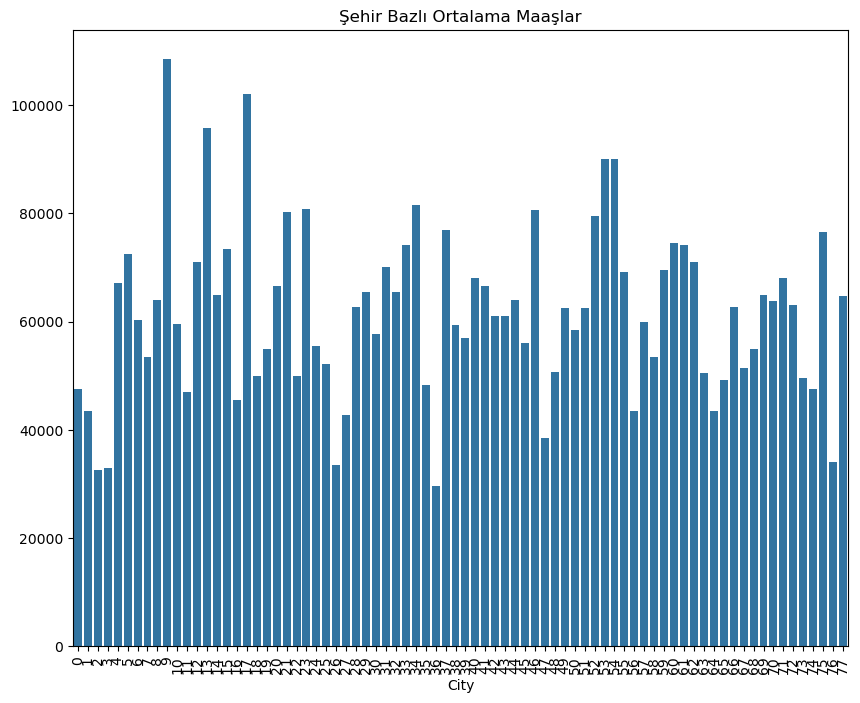

In [15]:
plt.figure(figsize=(10,8))
sns.barplot(x=city.index, y=city.values)
plt.xticks(rotation=90)
plt.title('Şehir Bazlı Ortalama Maaşlar')
plt.show()

In [16]:
#Şirketlere göre maaş karşılaştırması yapmak

In [17]:
#En çok maaş veren 10 şirket ve en az maaş veren 10 şirketi belirleme

In [18]:
company=df.groupby('Company')['Salary'].mean()

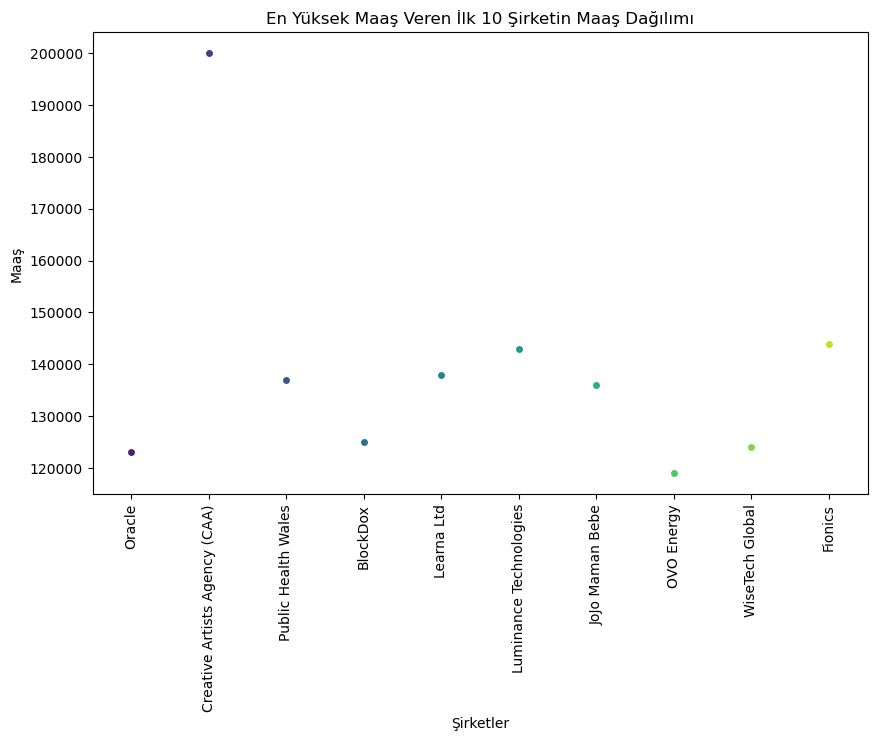

In [19]:
#En yüksek maaş veren 10 şirket
top10=company.nlargest(10).index
top10_df = df[df['Company'].isin(top10)]
plt.figure(figsize=(10,6))
sns.swarmplot(x='Company', y='Salary', data=top10_df, palette='viridis')
plt.xticks(rotation=90)
plt.title('En Yüksek Maaş Veren İlk 10 Şirketin Maaş Dağılımı')
plt.xlabel('Şirketler')
plt.ylabel('Maaş')
plt.show()           


In [20]:
#En az maaş veren 10 şirket

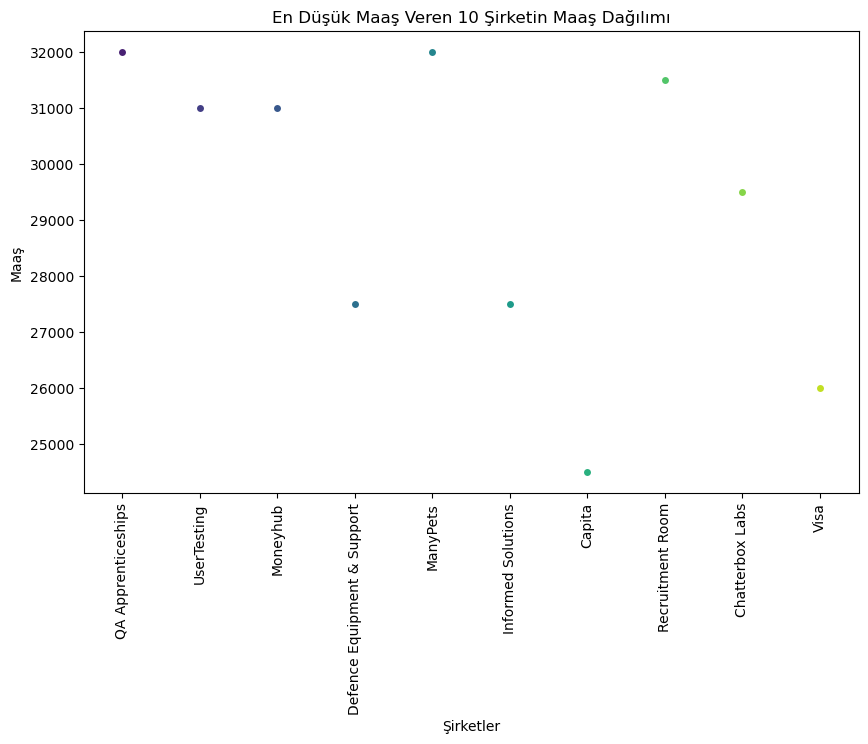

In [21]:
#En az maaş veren 10 şirket
lowest=company.nsmallest(10).index
lowest_df = df[df['Company'].isin(lowest)]
plt.figure(figsize=(10,6))
sns.swarmplot(x='Company', y='Salary', data=lowest_df, palette='viridis')
plt.xticks(rotation=90)
plt.title('En Düşük Maaş Veren 10 Şirketin Maaş Dağılımı')
plt.xlabel('Şirketler')
plt.ylabel('Maaş')
plt.show()           


In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
feature=df[['Salary','Company Score']]
scaler=StandardScaler()
scaled=scaler.fit_transform(feature)

In [25]:
from sklearn.cluster import KMeans

In [26]:
sse=[]
k_value=range(1,11)

for k in k_value:
    kmean=KMeans(n_clusters=k, random_state=42)
    kmean.fit(scaled)
    sse.append(kmean.inertia_)

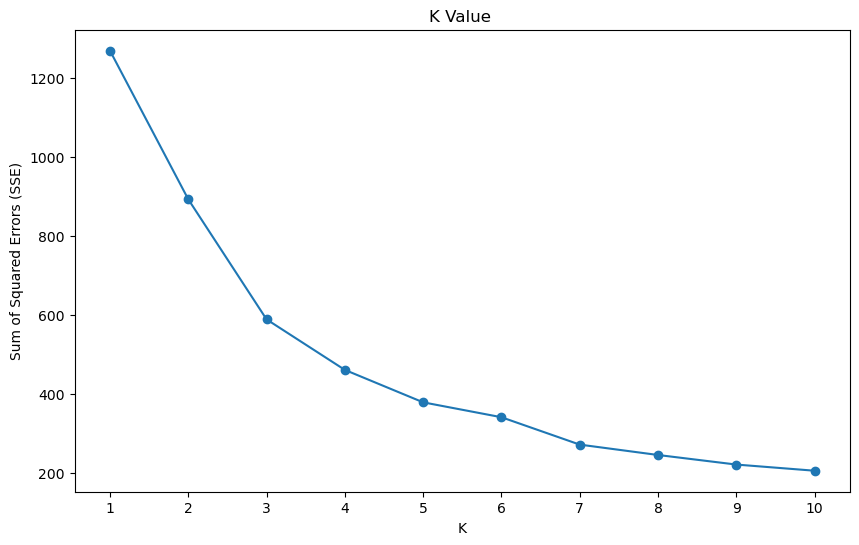

In [27]:
plt.figure(figsize=(10,6))
plt.plot(k_value, sse, marker='o')
plt.title('K Value ')
plt.xlabel('K')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(k_value)
plt.show()

In [28]:
k_val=6
kmeans=KMeans(n_clusters=k_val,random_state=42)
clusters=kmeans.fit_predict(scaled)

In [29]:
df['Cluster'] =clusters

In [30]:
#Kümeleme sonuçlarını görselleştirme

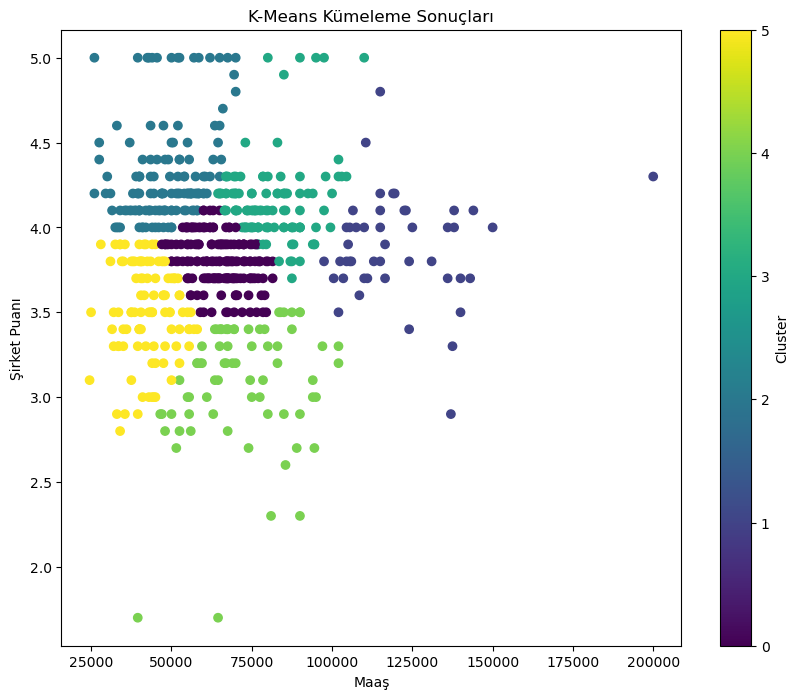

In [31]:
plt.figure(figsize=(10,8))
plt.scatter(df['Salary'], df['Company Score'], c=df['Cluster'], cmap='viridis')
plt.title('K-Means Kümeleme Sonuçları')
plt.xlabel('Maaş')
plt.ylabel('Şirket Puanı')
plt.colorbar(label='Cluster')
plt.show()